# 03. Naver Movie Ranking

## 네이버 영화 평점 사이트 분석
- https://movie.naver.com/
- 영화랭킹 탭 이동
- 영화랭킹에서 평점순(현재상영영화) 선택
    

'''
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20190228
'''

- 웹 페이지 주소에는 많은 정보가 담겨있습니다.
- 원하는 정보를 얻기 위해서 변화시켜줘야 하는 주소의 규칙을 찾을 수 있습니다
- 여기에서는 날짜 정보를 변경해주면 해당 페이지에 접근이 가능합니다

In [1]:
# requirements
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20190228"
response = urlopen(url)
# response.status
soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20190228" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <me

In [4]:
# 영화 제목 태그
soup.find_all("div", "tit5")

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=171539" title="그린 북">그린 북</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=174830" title="가버나움">가버나움</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=156464" title="보헤미안 랩소디">보헤미안 랩소디</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=144318" title="언더독">언더독</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=178434" title="폴란드로 간 아이들">폴란드로 간 아이들</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=14450" title="쉰들러 리스트">쉰들러 리스트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=109193" title="드래곤 길들이기 3">드래곤 길들이기 3</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=171725" title="스파이더맨: 뉴 유니버스">스파이더맨: 뉴 유니버스</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=172174" title="어느 가족">어느 가족</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver

In [ ]:
soup.select("div.tit5")

In [11]:
# 1
soup.find_all("div", "tit5")[0].a.text

'그린 북'

In [13]:
# 2
soup.select(".tit5")[0].find("a").text

'그린 북'

In [14]:
# 3
soup.select(".tit5")[0].select_one("a").text

'그린 북'

In [19]:
#  영화 평점 태그
soup.find_all("td", "point")

[<td class="point">9.63</td>,
 <td class="point">9.60</td>,
 <td class="point">9.43</td>,
 <td class="point">9.40</td>,
 <td class="point">9.40</td>,
 <td class="point">9.36</td>,
 <td class="point">9.26</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.21</td>,
 <td class="point">9.21</td>,
 <td class="point">9.18</td>,
 <td class="point">9.15</td>,
 <td class="point">9.09</td>,
 <td class="point">9.09</td>,
 <td class="point">9.09</td>,
 <td class="point">9.06</td>,
 <td class="point">8.95</td>,
 <td class="point">8.84</td>,
 <td class="point">8.84</td>,
 <td class="point">8.79</td>,
 <td class="point">8.78</td>,
 <td class="point">8.77</td>,
 <td class="point">8.72</td>,
 <td class="point">8.72</td>,
 <td class="point">8.66</td>,
 <td class="point">8.61</td>,
 <td class="point">8.59</td>,
 <td class="point">8.43</td>,
 <td class="point">8.41</td>,
 <td class="point">8.31</td>,
 <td class="point">8.29</td>,
 <td class

In [24]:
len(soup.find_all("td", "point")), len(soup.find_all("div", "tit5"))

(45, 45)

In [28]:
soup.find_all("td", class_="point")[0].text, soup.select("td.point")[0].text

('9.63', '9.63')

In [29]:
# 영화 제목 리스트

end = len(soup.find_all("div", "tit5"))

movie_name = []

for n in range(0, end):
    movie_name.append(
        soup.find_all("div", "tit5")[n].a.text

    )
movie_name

['그린 북',
 '가버나움',
 '보헤미안 랩소디',
 '언더독',
 '폴란드로 간 아이들',
 '쉰들러 리스트',
 '드래곤 길들이기 3',
 '스파이더맨: 뉴 유니버스',
 '어느 가족',
 '님아, 그 강을 건너지 마오',
 '러빙 빈센트',
 '드래곤볼 슈퍼: 브로리',
 '바울',
 '스타 이즈 본',
 '증인',
 '인생 후르츠',
 '로마',
 '말모이',
 '더 페이버릿: 여왕의 여자',
 '레고 무비2',
 '일일시호일',
 '델타 보이즈',
 '극장판 헬로카봇:옴파로스 섬의 비밀',
 '알리타: 배틀 엔젤',
 '주먹왕 랄프 2: 인터넷 속으로',
 '김광석',
 '극한직업',
 '사랑은 비가 갠 뒤처럼',
 '항거:유관순 이야기',
 '어둠 속의 댄서',
 '레토',
 '메리 포핀스 리턴즈',
 '내안의 그놈',
 '더 랍스터',
 '해피 데스데이 2 유',
 '블랙 팬서',
 '신데렐라:마법 반지의 비밀',
 '사바하',
 '킬링 디어',
 '어쩌다, 결혼',
 '콜드 체이싱',
 '뺑반',
 '기묘한 가족',
 'PMC: 더 벙커',
 '자전차왕 엄복동']

In [31]:
# 위 코드를 한줄로 표현하기
ovie_name = [soup.select(".tit5")[n].a.text for n in range(0, end)]
movie_name

['그린 북',
 '가버나움',
 '보헤미안 랩소디',
 '언더독',
 '폴란드로 간 아이들',
 '쉰들러 리스트',
 '드래곤 길들이기 3',
 '스파이더맨: 뉴 유니버스',
 '어느 가족',
 '님아, 그 강을 건너지 마오',
 '러빙 빈센트',
 '드래곤볼 슈퍼: 브로리',
 '바울',
 '스타 이즈 본',
 '증인',
 '인생 후르츠',
 '로마',
 '말모이',
 '더 페이버릿: 여왕의 여자',
 '레고 무비2',
 '일일시호일',
 '델타 보이즈',
 '극장판 헬로카봇:옴파로스 섬의 비밀',
 '알리타: 배틀 엔젤',
 '주먹왕 랄프 2: 인터넷 속으로',
 '김광석',
 '극한직업',
 '사랑은 비가 갠 뒤처럼',
 '항거:유관순 이야기',
 '어둠 속의 댄서',
 '레토',
 '메리 포핀스 리턴즈',
 '내안의 그놈',
 '더 랍스터',
 '해피 데스데이 2 유',
 '블랙 팬서',
 '신데렐라:마법 반지의 비밀',
 '사바하',
 '킬링 디어',
 '어쩌다, 결혼',
 '콜드 체이싱',
 '뺑반',
 '기묘한 가족',
 'PMC: 더 벙커',
 '자전차왕 엄복동']

In [32]:
# 영화 평점 리스트

end = len(soup.find_all("td", "point"))

movie_point = [soup.select("td.point")[n].text for n in range(0, end)]
movie_point

['9.63',
 '9.60',
 '9.43',
 '9.40',
 '9.40',
 '9.36',
 '9.26',
 '9.23',
 '9.23',
 '9.23',
 '9.21',
 '9.21',
 '9.18',
 '9.15',
 '9.09',
 '9.09',
 '9.09',
 '9.06',
 '8.95',
 '8.84',
 '8.84',
 '8.79',
 '8.78',
 '8.77',
 '8.72',
 '8.72',
 '8.66',
 '8.61',
 '8.59',
 '8.43',
 '8.41',
 '8.31',
 '8.29',
 '7.88',
 '7.81',
 '7.50',
 '7.36',
 '7.23',
 '6.98',
 '6.65',
 '6.40',
 '6.31',
 '5.67',
 '5.24',
 '3.92']

In [33]:
# 전체 데이터 수 확인

len(movie_point), len(movie_name)

(45, 45)

In [36]:
data = {
    "영화 제목": movie_name,
    "영화 평점": movie_point,

}


In [37]:
df = pd.DataFrame(data)

In [38]:
df

,영화 제목,영화 평점
0,그린 북,9.63
1,가버나움,9.60
2,보헤미안 랩소디,9.43
3,언더독,9.40
4,폴란드로 간 아이들,9.40
5,쉰들러 리스트,9.36
6,드래곤 길들이기 3,9.26
7,스파이더맨: 뉴 유니버스,9.23
8,어느 가족,9.23
9,"님아, 그 강을 건너지 마오",9.23


## 2. 자동화를 위한 코드

url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20190228"
- 날짜만 변경하면 우리가 원하는 기간 만큼 데이터를 얻을 수 있습니다

In [40]:
date = pd.date_range("2021.01.01", periods=100, freq="D")
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [42]:
date[0]

Timestamp('2021-01-01 00:00:00', freq='D')

In [44]:
date[0].strftime("%Y.%m.%d")

'2021.01.01'

In [46]:
# 문자열 format

test_string = "Hi, I'm {name}"
test_string.format(name="Zerobase")

"Hi, I'm Zerobase"

In [48]:
import time
from tqdm import tqdm

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}"
    response = urlopen(url.format(date=today.strftime("%Y%m%d")))
    soup = BeautifulSoup(response, "html.parser")

    end = len(soup.find_all("td", "point"))

    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.select("div.tit5")[n].find("a").get_text() for n in range(0, end)])
    movie_point.extend([soup.find_all("td", "point")[n].text for n in range(0, end)])

    time.sleep(0.5) #사람인 척 하기

100%|██████████| 100/100 [02:28<00:00,  1.48s/it]


In [49]:
len(movie_date), len(movie_name), len(movie_point)

(4793, 4793, 4793)

In [52]:
movie_name[:5]

['가나의 혼인잔치: 언약', '언플랜드', '극장판 바이올렛 에버가든', '부활: 그 증거', '소년시절의 너']

In [54]:
movie = pd.DataFrame({
    "date": movie_date,
    "name": movie_name,
    "point": movie_point,

})

movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


In [55]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 112.5+ KB


In [57]:
movie["point"] = movie["point"].astype(float)

In [58]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4793 non-null   datetime64[ns]
 1   name    4793 non-null   object        
 2   point   4793 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 112.5+ KB


In [59]:
movie.to_csv(
    "../data/03. naver_movie_data.csv", sep=",", encoding="utf-8"
)

In [62]:
pd.read_csv("../data/03. naver_movie_data.csv", index_col=0)

,date,name,point
0,2021-01-01,가나의 혼인잔치: 언약,9.59
1,2021-01-01,언플랜드,9.52
2,2021-01-01,극장판 바이올렛 에버가든,9.49
3,2021-01-01,부활: 그 증거,9.40
4,2021-01-01,소년시절의 너,9.39
...,...,...,...
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91


In [3]:
## 3. 영화 평점 데이터 정리
import numpy as np
import pandas as pd

In [4]:
movie = pd.read_csv("../data/03. naver_movie_data.csv", index_col=0)

In [65]:
movie.tail()

,date,name,point
4788,2021-04-10,두번째 사랑,8.00
4789,2021-04-10,날씨의 아이,7.95
4790,2021-04-10,밀양,7.92
4791,2021-04-10,별을 쫓는 아이,7.91
4792,2021-04-10,너는 여기에 없었다,7.82


- 영화 이름으로 인덱스를 잡습니다.
- 점수의 합산을 구합니다.
- 100일 간 네이버 영화 평점 합산 기준 베스트&워스트 10 선정

In [5]:
# pivot table

movie_unique = pd.pivot_table(data=movie, index="name", aggfunc=np.sum)
movie_unique

,point
name,
120BPM,2.76
1917,62.09
800,25.27
가나의 혼인잔치: 언약,501.68
건축학개론,78.03
...,...
해피 투게더,703.29
허트 로커,219.32
현기증,198.56


In [6]:
movie_best = movie_unique.sort_values(by="point", ascending=False)
movie_best

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12
...,...
고질라,13.34
초미의 관심사,7.37
레이니 데이 인 뉴욕,5.54


In [7]:
tmp = movie.query("name == ['화양연화']")
tmp

,date,name,point
22,2021-01-01,화양연화,8.80
70,2021-01-02,화양연화,8.79
117,2021-01-03,화양연화,8.75
162,2021-01-04,화양연화,8.76
205,2021-01-05,화양연화,8.76
...,...,...,...
4571,2021-04-06,화양연화,8.79
4621,2021-04-07,화양연화,8.79
4668,2021-04-08,화양연화,8.79
4719,2021-04-09,화양연화,8.79


In [8]:
# 시각화

import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
%matplotlib inline

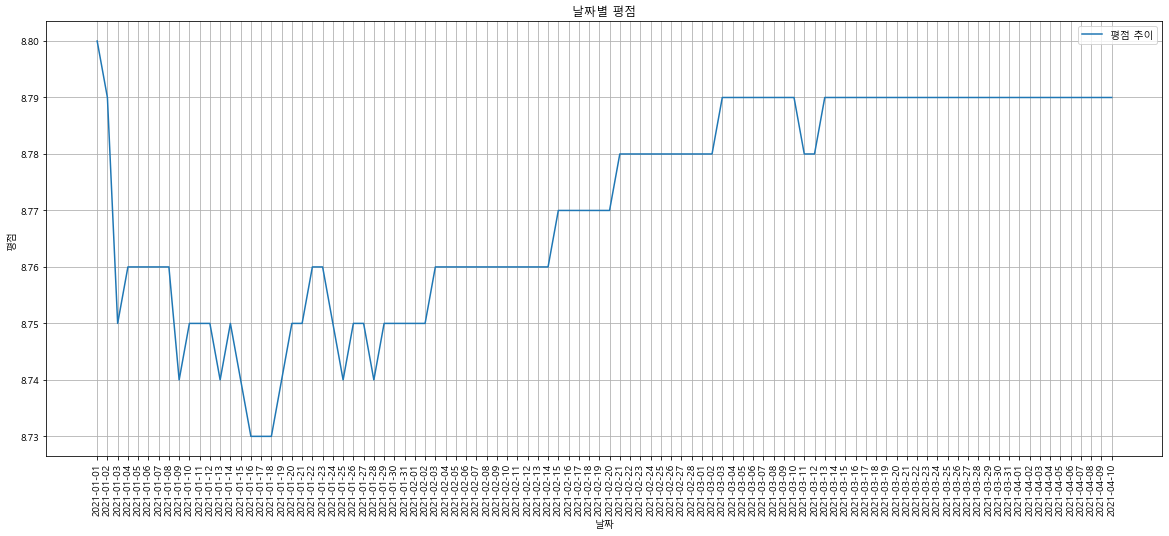

In [9]:
plt.figure(figsize=(20, 8)) # x 20, y 8
plt.plot(tmp["date"], tmp["point"]) # 선 그래프 x축 날짜, y축 평점 => 날짜에 따른 평점 변화를 선그래프로 표현
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.legend(labels=["평점 추이"], loc="best")
plt.grid(True)
plt.show()


In [85]:
# 상위 10개 영화
movie_best.head(10)

,point
name,
너의 췌장을 먹고 싶어,959.59
극장판 바이올렛 에버가든,949.98
부활: 그 증거,936.44
러브 액츄얼리,893.02
화양연화,877.12
타오르는 여인의 초상,833.51
너의 이름은.,817.40
아비정전,814.83
찬실이는 복도 많지,785.58


In [86]:
# 하위 10개 영화
movie_best.tail(10)

,point
name,
최악의 하루,23.40
열혈남아,23.16
영웅본색,18.36
너는 여기에 없었다,15.64
협상,14.64
고질라,13.34
초미의 관심사,7.37
레이니 데이 인 뉴욕,5.54
신 고질라,4.97


In [87]:
movie_pivot = pd.pivot_table(data=movie, index="date", columns="name", values="point")
movie_pivot.head()

name,120BPM,1917,800,가나의 혼인잔치: 언약,건축학개론,고질라,고질라 VS. 콩,국가부도의 날,굿바이,귀여운 여인,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,허트 로커,현기증,협상,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,3.60,9.59,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.80
2021-01-02,NaN,NaN,3.60,9.56,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.89,NaN,NaN,NaN,NaN,8.79
2021-01-03,NaN,NaN,3.60,9.54,NaN,NaN,NaN,NaN,9.04,8.7,...,8.66,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.75
2021-01-04,NaN,NaN,3.61,9.51,NaN,NaN,NaN,NaN,9.04,8.7,...,NaN,NaN,8.11,NaN,8.88,NaN,NaN,NaN,NaN,8.76
2021-01-05,NaN,NaN,3.62,9.52,NaN,NaN,NaN,NaN,9.04,NaN,...,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,8.76


In [88]:
movie_pivot.to_excel("../data/03. movie_pivot.xlsx")

In [89]:
import platform
import seaborn as sns
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

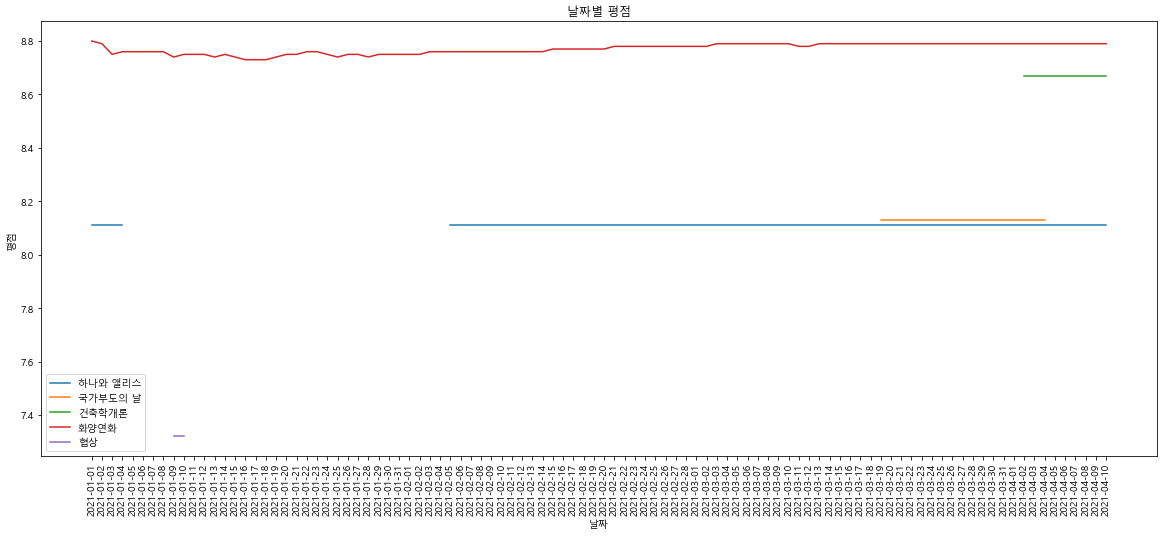

In [93]:
target_col = ["하나와 앨리스", "국가부도의 날", "건축학개론", "화양연화", "협상"]
plt.figure(figsize=(20, 8))
plt.title("날짜별 평점")
plt.xlabel("날짜")
plt.ylabel("평점")
plt.xticks(rotation="vertical")
plt.tick_params(bottom="off", labelbottom="off")
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc="best")
plt.grid= True
